In [1]:
!pip install dtale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
import urllib.parse
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import dtale
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/aluminium/Time series Al.xlsx')
display(df.head())

,Date,Price
0,12/31/2024,19775
1,12/30/2024,19765
2,12/27/2024,19765
3,12/26/2024,19805
4,12/25/2024,19880


In [5]:
#material code wise Dataframes
data = df.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    969 non-null    object
 1   Price   969 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


None

In [6]:
df['Date'].nunique()

969

In [7]:
df['Price'].nunique()

589

In [8]:
duplicate_values = df.duplicated(subset=None,keep = 'first').sum()
print(' Number of Duplicate values: ',duplicate_values)

 Number of Duplicate values:  0


In [9]:
df.isnull().sum()

,0
Date,0
Price,0


In [10]:
display(df)

,Date,Price
0,12/31/2024,19775
1,12/30/2024,19765
2,12/27/2024,19765
3,12/26/2024,19805
4,12/25/2024,19880
...,...,...
964,2021-08-01 00:00:00,15640
965,2021-07-01 00:00:00,15485
966,2021-06-01 00:00:00,15595
967,2021-05-01 00:00:00,15595


<!-- # weekly sales pattern for Each Mat Code -->

In [11]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop any rows where the conversion failed (if applicable)
df = df.dropna(subset=['Date'])

# Sort data by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Verify the data structure again
df.head()


,Date,Price
0,2021-01-02,15195
1,2021-01-03,17095
2,2021-01-04,17290
3,2021-01-06,18760
4,2021-01-07,18730


In [12]:
display(df)

,Date,Price
0,2021-01-02,15195
1,2021-01-03,17095
2,2021-01-04,17290
3,2021-01-06,18760
4,2021-01-07,18730
...,...,...
964,2024-12-25,19880
965,2024-12-26,19805
966,2024-12-27,19765
967,2024-12-30,19765


In [13]:
# Sort data by date
df = df.sort_values(by='Date')

In [14]:
# Get date range
start_date = df['Date'].min()
end_date = df['Date'].max()

In [15]:
start_date

Timestamp('2021-01-02 00:00:00')

In [16]:
end_date

Timestamp('2024-12-31 00:00:00')

In [17]:
 # Start Dtale session
dtale_app = dtale.show(df)
dtale_app.open_browser()


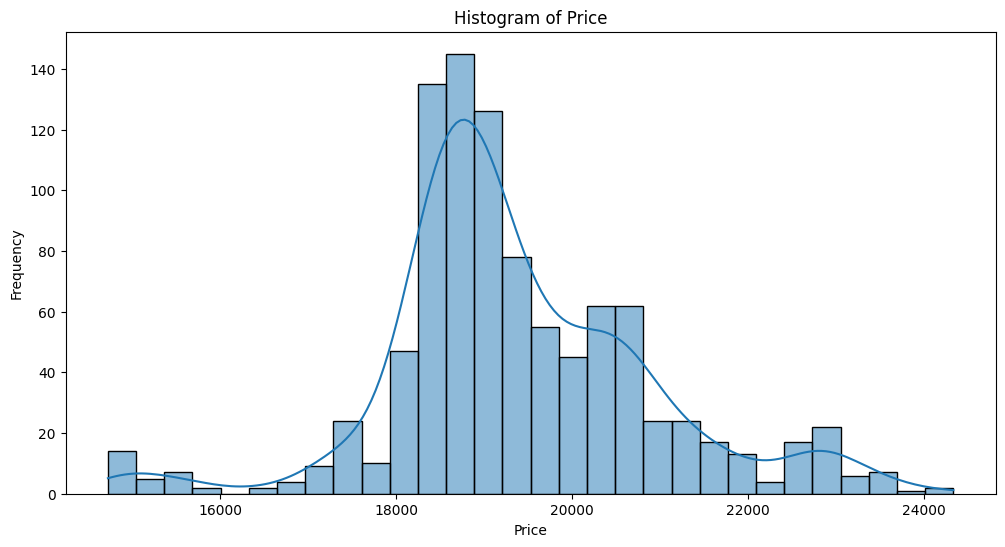

In [18]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df.Price, bins=30, kde=True)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Distribution Shape:


The histogram shows a slightly right-skewed distribution, as the tail on the right-hand side (higher prices) is longer than the left.
Most of the data is concentrated between 18,000 and 22,000.

Central Tendency:


The peak of the histogram aligns with the mean and median, suggesting the majority of prices fall within this range.

Spread:


The prices range broadly between 14,000 and 24,000, with most data concentrated in the middle.

Outliers:

The right tail suggests possible outliers on the higher end (above 22,000).

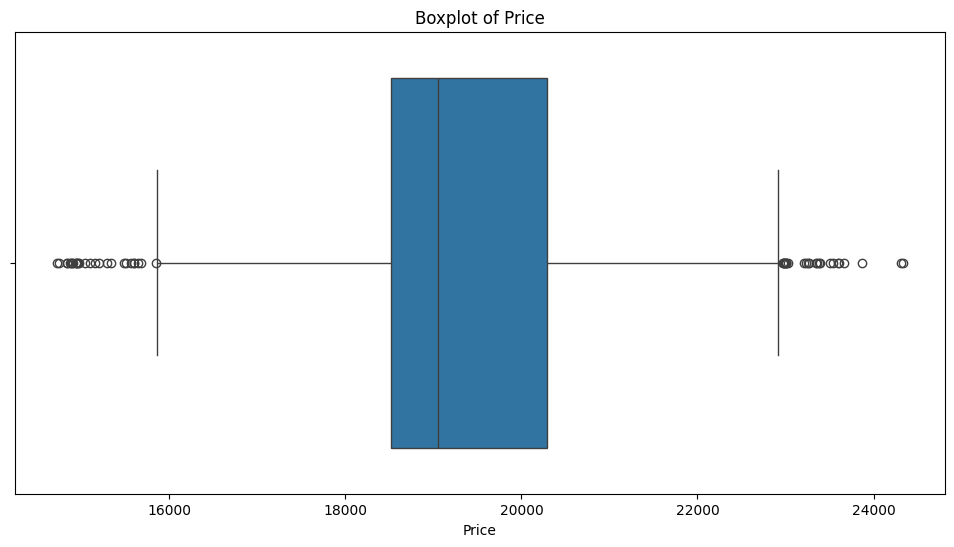

In [19]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.Price)
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

Boxplot Summary:


The central box represents the Interquartile Range (IQR), which contains 50% of the data (from the 25th percentile to the 75th percentile).

The line inside the box indicates the median price.

The whiskers extend to 1.5 times the IQR from the lower and upper quartiles, indicating the range of typical data points.

Outliers:


Points outside the whiskers are considered outliers.

The plot shows outliers on both ends, with more on the lower side (below 16,000) and higher side (above 22,000).

Data Spread:


The data is skewed, with more variability toward the lower and higher prices compared to the center.

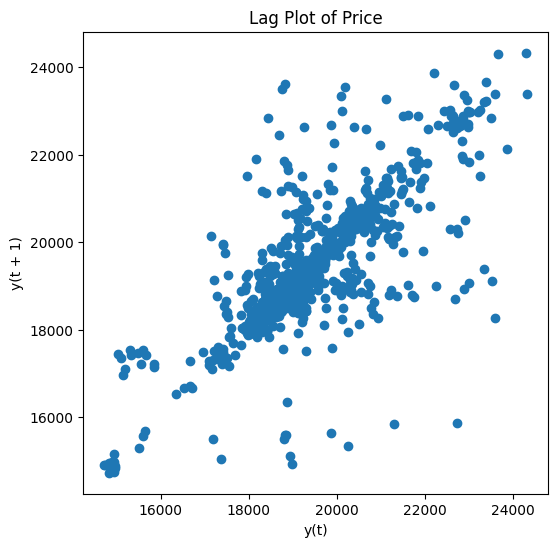

In [20]:
# Lag Plot
plt.figure(figsize=(6, 6))
lag_plot(df.Price)
plt.title("Lag Plot of Price")
plt.show()

Lag Plot:

A lag plot shows the relationship between a time series and its lagged version (e.g.,

The points in the plot are closely aligned along a diagonal trend, indicating a strong positive autocorrelation at lag 1.
    
This suggests that the current price is highly dependent on the previous time step

Stationarity Confirmation:


A clear pattern in the lag plot aligns with the earlier finding that the data is stationary, as stationary data often shows consistent dependencies between lags.


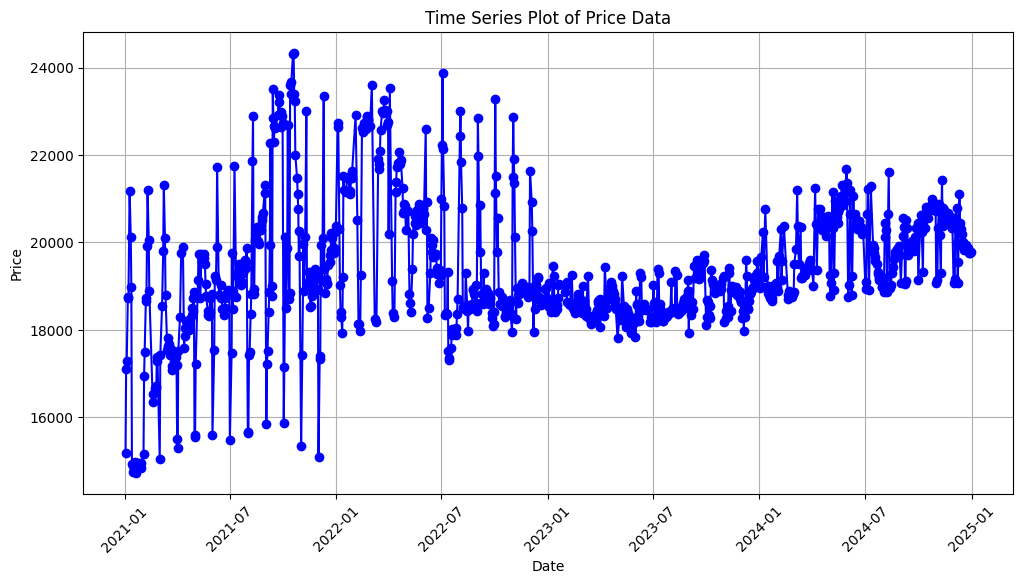

In [21]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot of Price Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Key insights from the initial analysis:


Missing Values:
No missing values in the dataset.

Duplicate Values:
No duplicate records.

Date Range:
The data spans from January 2, 2021, to December 31, 2024.

Trend Observation:
The plotted time series shows the price variation over time.


Next steps:

Check the frequency of data points (daily, weekly, etc.).

Test for stationarity using the Augmented Dickey-Fuller (ADF) test.

Examine autocorrelation patterns.

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller (ADF) test for stationarity
adf_test = adfuller(df['Price'])
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

# Display ADF test results
adf_result


{'ADF Statistic': -3.3563925024143453,
 'p-value': 0.012538373658657318,
 'Critical Values': {'1%': -3.43725945868569,
  '5%': -2.8645903751292536,
  '10%': -2.5683941938438886}}

Stationarity Check (ADF Test):

ADF Statistic: -3.356

p-value: 0.0125 (which is less than 0.05)

Critical Values:
The test statistic is lower than the 5% and 10% thresholds, indicating that the data is likely stationary at a 95% confidence level.

This suggests no need for differencing before modeling.

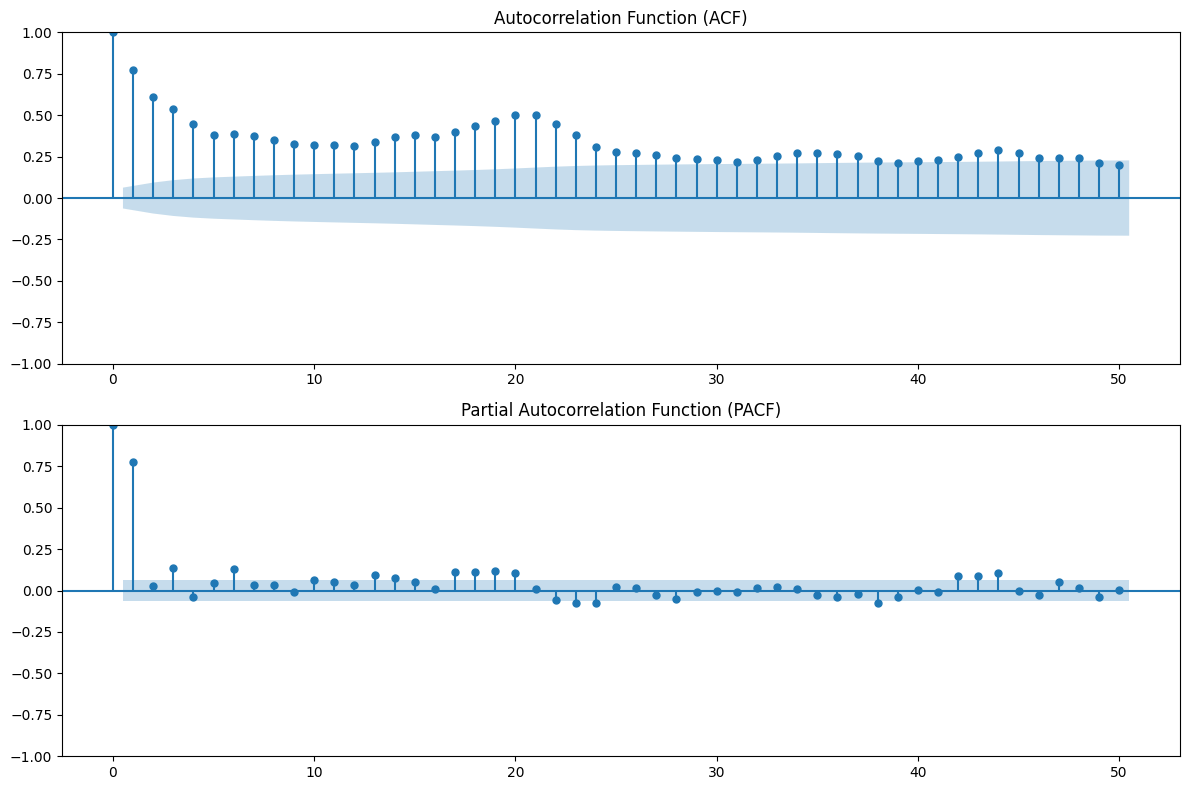

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to identify patterns
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Price'], ax=ax[0], lags=50)
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df['Price'], ax=ax[1], lags=50, method="ywm")
ax[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


Insights from ACF and PACF:

Autocorrelation Function (ACF):


The ACF plot shows significant positive correlation at multiple lags, indicating strong dependencies over time.

A slow decay suggests possible seasonality or long-term trends.


Partial Autocorrelation Function (PACF):


The PACF plot shows a significant spike at lag 1, indicating that the series is primarily influenced by its immediate past value.

In [24]:
# Moving Averages (Short-Term: 30 days, Long-Term: 90 days)
df['MA_30'] = df['Price'].rolling(window=30).mean()
df['MA_90'] = df['Price'].rolling(window=90).mean()

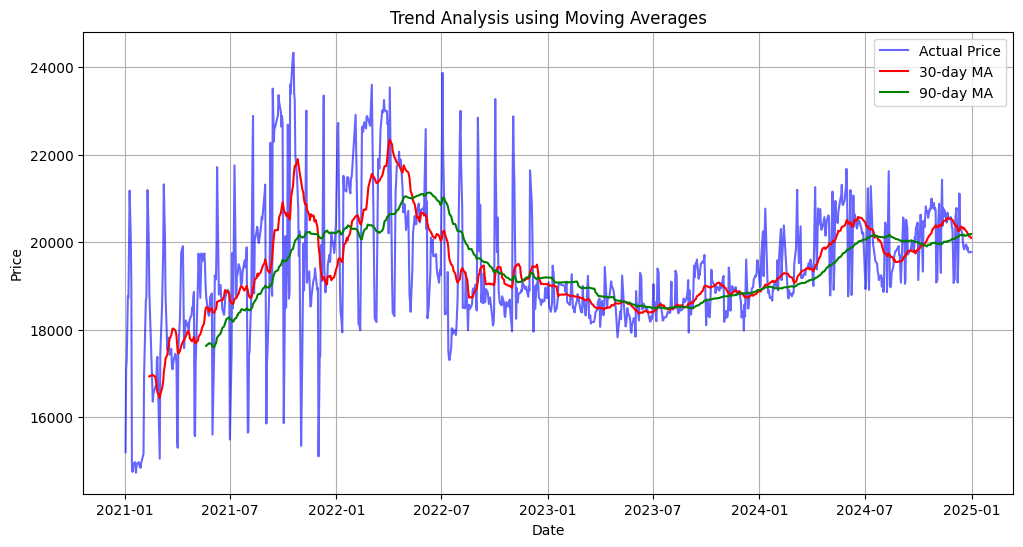

In [25]:
# Plot Trend using Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Actual Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA_30'], label='30-day MA', color='red')
plt.plot(df['Date'], df['MA_90'], label='90-day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trend Analysis using Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Seasonal Decomposition (Multiplicative Model)
decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)

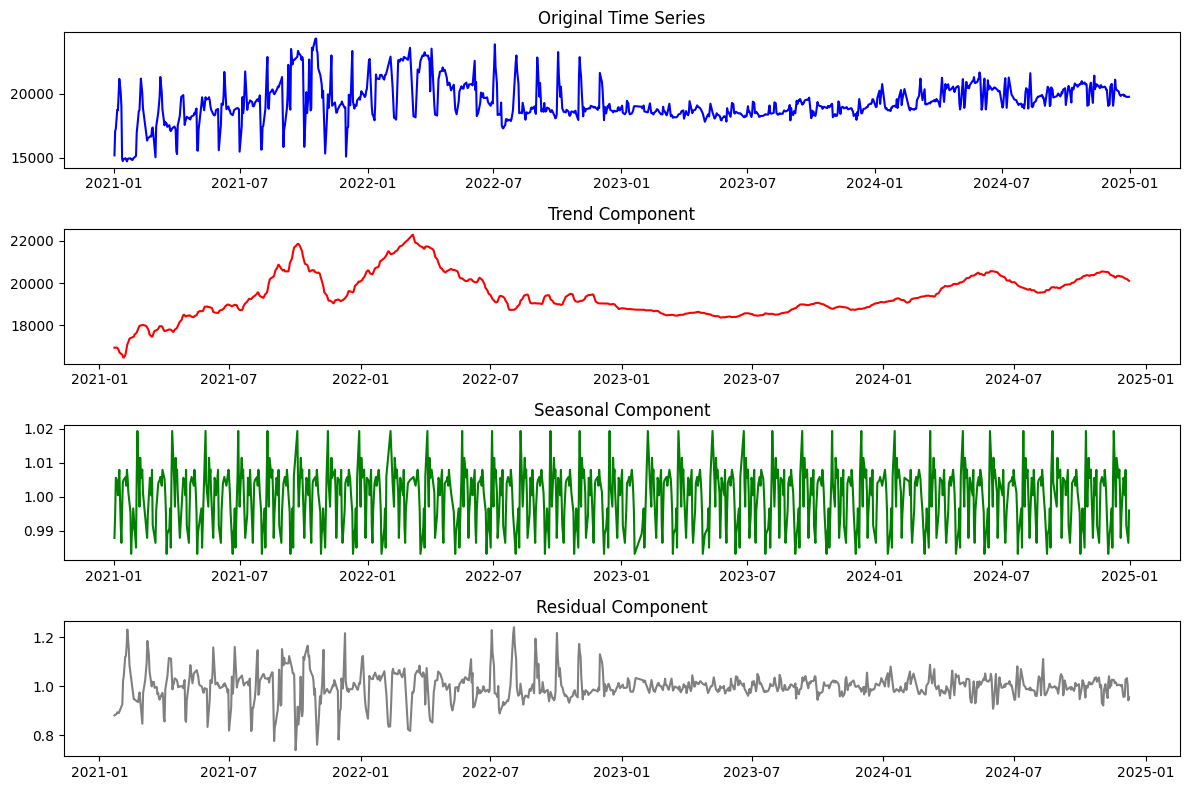

In [27]:
# Plot the decomposition results
fig, ax = plt.subplots(4, 1, figsize=(12, 8))

ax[0].plot(df['Date'], df['Price'], label='Original', color='blue')
ax[0].set_title("Original Time Series")

ax[1].plot(df['Date'], decomposition.trend, label='Trend', color='red')
ax[1].set_title("Trend Component")

ax[2].plot(df['Date'], decomposition.seasonal, label='Seasonality', color='green')
ax[2].set_title("Seasonal Component")

ax[3].plot(df['Date'], decomposition.resid, label='Residuals', color='gray')
ax[3].set_title("Residual Component")

plt.tight_layout()
plt.show()

Trend Analysis (Moving Averages):


The 30-day moving average captures short-term trends, while the 90-day moving average smooths out fluctuations.

There's a general upward trend over time.

Seasonality & Decomposition:


Trend Component: Confirms a general increasing trend.

Seasonality Component: Shows a repeating pattern, suggesting periodic fluctuations.

Residual Component: Some random variations exist, indicating external influences

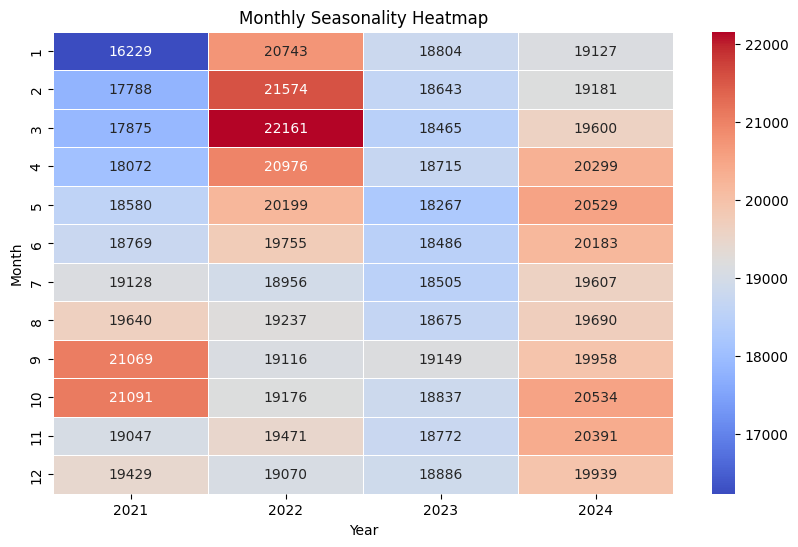

In [28]:
# Extract year and month for seasonality analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Pivot table for heatmap visualization (monthly seasonality)
seasonality_table = df.pivot_table(index='Month', columns='Year', values='Price', aggfunc='mean')

# Plot Heatmap for Monthly Seasonality
plt.figure(figsize=(10, 6))
sns.heatmap(seasonality_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Monthly Seasonality Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


Clear monthly seasonality:
Some months consistently have higher prices than others.

The seasonality component in decomposition confirms repeated patterns.

Demand peaks and dips in specific months, indicating a seasonal effect.

If the business is affected by external factors (e.g., festivals, fiscal cycles), prices reflect these changes.


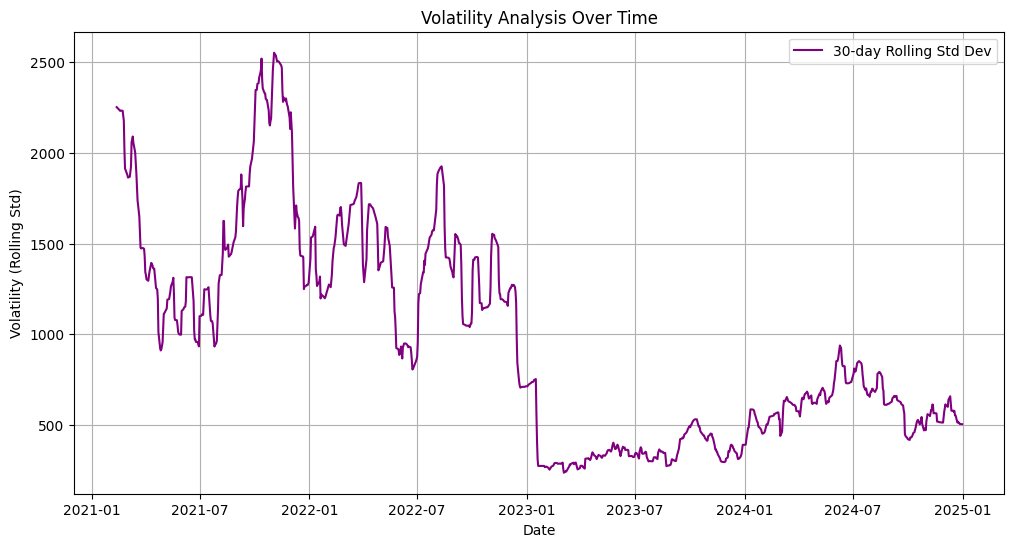

In [29]:
# Rolling Standard Deviation (Volatility Analysis)
df['Rolling_Std_30'] = df['Price'].rolling(window=30).std()

# Plot Volatility (Rolling Std Dev)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rolling_Std_30'], label="30-day Rolling Std Dev", color='purple')
plt.xlabel("Date")
plt.ylabel("Volatility (Rolling Std)")
plt.title("Volatility Analysis Over Time")
plt.legend()
plt.grid(True)
plt.show()



Volatility Trends:


Rolling standard deviation analysis shows periods of high and low volatility.

Some periods have increased fluctuations, which might be due to market events or seasonal factors.

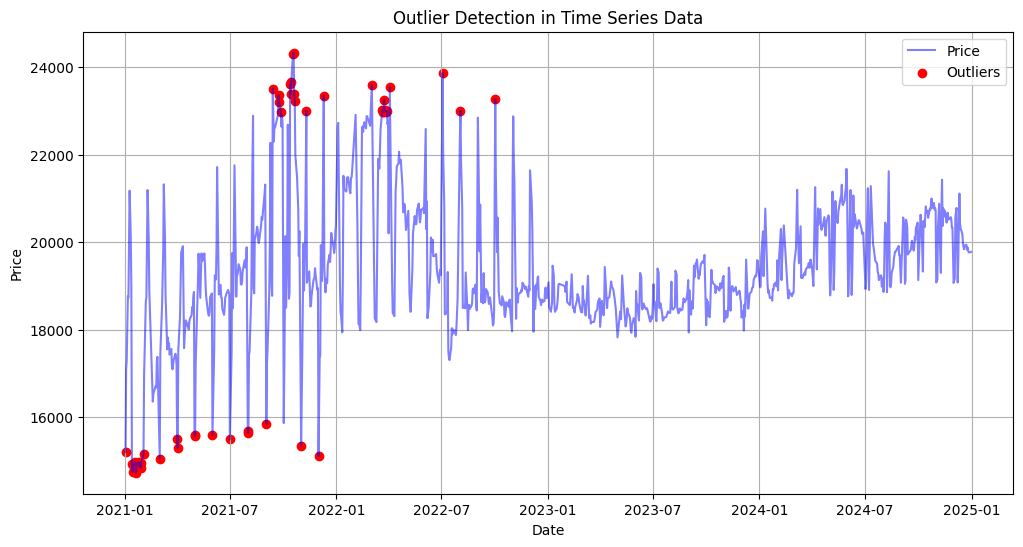

          Date  Price
0   2021-01-02  15195
8   2021-01-13  14935
9   2021-01-14  14745
10  2021-01-15  14895
11  2021-01-18  14970
12  2021-01-19  14835
13  2021-01-20  14725
14  2021-01-21  14900
15  2021-01-22  14945
16  2021-01-25  14965
17  2021-01-26  14875
18  2021-01-27  14885
19  2021-01-28  14835
20  2021-01-29  14950
21  2021-02-02  15155
37  2021-03-02  15045
57  2021-04-01  15505
58  2021-04-02  15295
77  2021-05-01  15595
78  2021-05-02  15560
96  2021-06-01  15595
115 2021-07-01  15485
136 2021-08-01  15640
137 2021-08-02  15675
159 2021-09-02  15850
168 2021-09-13  23510
174 2021-09-23  23360
175 2021-09-24  23205
176 2021-09-27  22975
188 2021-10-13  23605
189 2021-10-14  23385
190 2021-10-15  23665
191 2021-10-18  24310
192 2021-10-19  24330
193 2021-10-20  23390
194 2021-10-21  23235
201 2021-11-01  15340
206 2021-11-10  23005
220 2021-12-01  15100
226 2021-12-10  23350
280 2022-03-03  23600
288 2022-03-21  23010
289 2022-03-22  22980
290 2022-03-23  22970
291 2022-0

In [30]:
# Outlier Detection using IQR (Interquartile Range Method)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
df['Outlier'] = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)
outliers = df[df['Outlier'] == True]

# Scatter plot to show outliers
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label="Price", color='blue', alpha=0.5)
plt.scatter(outliers['Date'], outliers['Price'], color='red', label="Outliers", marker='o')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Outlier Detection in Time Series Data")
plt.legend()
plt.grid(True)
plt.show()


# Save outliers to a CSV file
outliers[['Date', 'Price']].to_csv("Detected_Outliers.csv", index=False)

# Display in Pandas
print(outliers[['Date', 'Price']])

Outlier Detection:

Outliers (marked in red) indicate significant price drops in early 2021.

These could be due to market crashes, sudden demand shifts, or other anomalies.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import pickle

In [32]:
# Split into training and testing sets
train_size = int(0.8 * len(df))
train, test = df[:train_size], df[train_size:]


In [33]:
# Store model performance
model_results = {}

In [34]:
# 1. ARIMA Model
arima_model = ARIMA(train['Price'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
arima_mape = mean_absolute_percentage_error(test['Price'], arima_forecast)
model_results['ARIMA'] = arima_mape

In [35]:
# 2. SARIMA Model
sarima_model = SARIMAX(train['Price'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_mape = mean_absolute_percentage_error(test['Price'], sarima_forecast)
model_results['SARIMA'] = sarima_mape

In [36]:
from prophet import Prophet

In [37]:
# 3. Facebook Prophet Model
prophet_df = train.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
prophet_test = test.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)
prophet_forecast = forecast[['ds', 'yhat']].iloc[-len(test):]
prophet_mape = mean_absolute_percentage_error(prophet_test['y'], prophet_forecast['yhat'])
model_results['Prophet'] = prophet_mape

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pxgayyj/c61t31f_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pxgayyj/av5jftbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45636', 'data', 'file=/tmp/tmp3pxgayyj/c61t31f_.json', 'init=/tmp/tmp3pxgayyj/av5jftbn.json', 'output', 'file=/tmp/tmp3pxgayyj/prophet_modelke2hccps/prophet_model-20250205160339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:03:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:03:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
# 4. LSTM Model
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Price']])
X_train, y_train, X_test, y_test = [], [], [], []
seq_length = 30
for i in range(seq_length, len(train)):
    X_train.append(df_scaled[i-seq_length:i, 0])
    y_train.append(df_scaled[i, 0])
for i in range(seq_length, len(test)):
    X_test.append(df_scaled[i-seq_length:i, 0])
    y_test.append(df_scaled[i, 0])
X_train, y_train, X_test, y_test = map(np.array, [X_train, y_train, X_test, y_test])
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_mape = mean_absolute_percentage_error(y_test_original, lstm_predictions)
model_results['LSTM'] = lstm_mape


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0687
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0197
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0186
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0178
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0182
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0145
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0172
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0132
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0150
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0134
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136
Epoch 15/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - lo

In [39]:
# 5. XGBoost Model
xgb_model = GradientBoostingRegressor()
x_train = np.arange(len(train)).reshape(-1, 1)
y_train = train['Price'].values.ravel()
x_test = np.arange(len(train), len(df)).reshape(-1, 1)
y_test = test['Price'].values.ravel()
xgb_model.fit(x_train, y_train)
xgb_forecast = xgb_model.predict(x_test)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_forecast)
model_results['XGBoost'] = xgb_mape


In [40]:
# Identify the best model
best_model_name = min(model_results, key=model_results.get)
print(f'Best Model: {best_model_name} with MAPE: {model_results[best_model_name]}')

Best Model: XGBoost with MAPE: 0.0411184357614124


In [44]:
import os

In [45]:
os.chdir('/content/drive/MyDrive/aluminium')

In [46]:
# Save the best model
if best_model_name == 'ARIMA':
    pickle.dump(arima_fit, open('best_model.pkl', 'wb'))
elif best_model_name == 'SARIMA':
    pickle.dump(sarima_fit, open('best_model.pkl', 'wb'))
elif best_model_name == 'Prophet':
    pickle.dump(prophet_model, open('best_model.pkl', 'wb'))
elif best_model_name == 'LSTM':
    lstm_model.save('best_model.h5')
elif best_model_name == 'XGBoost':
    pickle.dump(xgb_model, open('best_model.pkl', 'wb'))

In [42]:
import os

In [43]:
os.getcwd()

'/content'